In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Define Lorentz func**

In [2]:

def lorentz(x, gamma, x0):
    return (1*gamma/(np.pi*((x - x0)**2) + gamma**2))

# def peak_cluster(x,Peak_width, peak2_center, peak1_center):
#     [lorentz(x, Peak_width, peak1_center), lorentz(x,Peak_width,  peak2_center)]

**Plot variables**

In [3]:
steps = 1000
x_start = -50
x_end = 10
steps_ppm = (x_end - x_start)/steps
x = np.arange(x_start, x_end, steps_ppm)
# print(x)
# print(lorentz(x_end, Peak_width, cluster_2_center))

**Information of nuclei**

In [4]:
m = 3/2 #spin of nuclei
clusters = 2 # magnetically different nuclei in unit cell
peaks = int(2*m)


[-20. -18. -16. -14. -12. -10.  -8.  -6.  -4.  -2.   0.]
[ -0.  -2.  -4.  -6.  -8. -10. -12. -14. -16. -18. -20.]


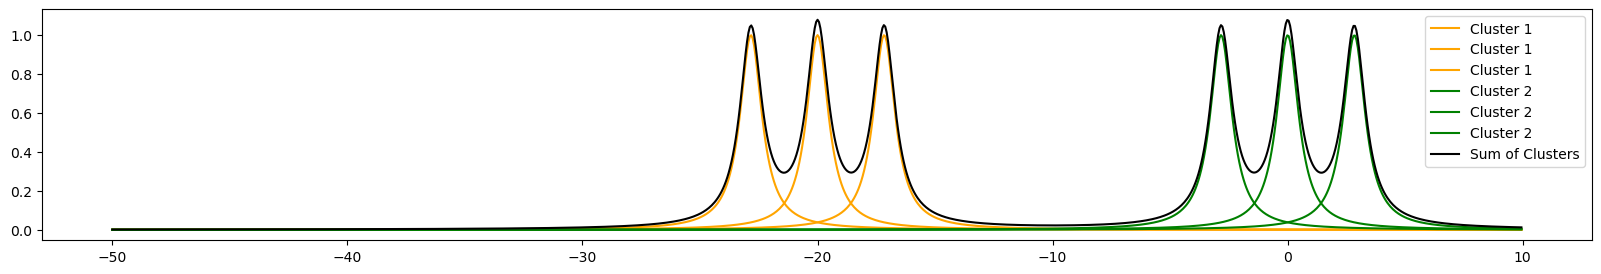

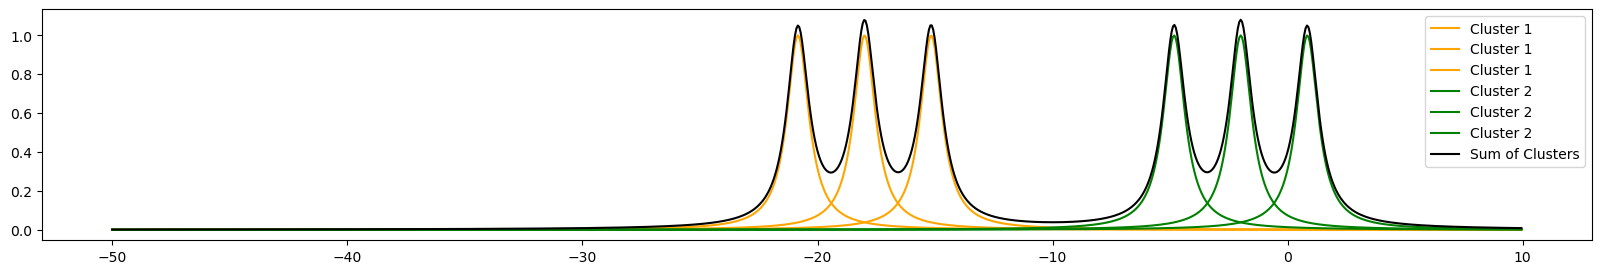

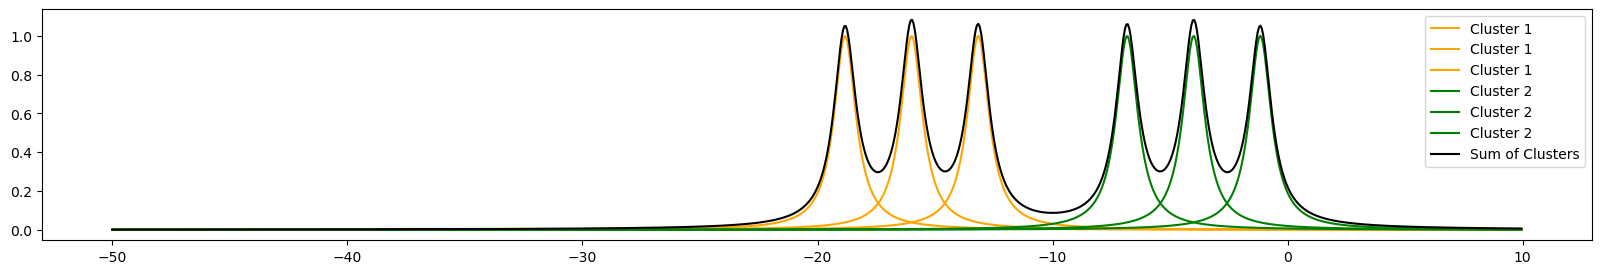

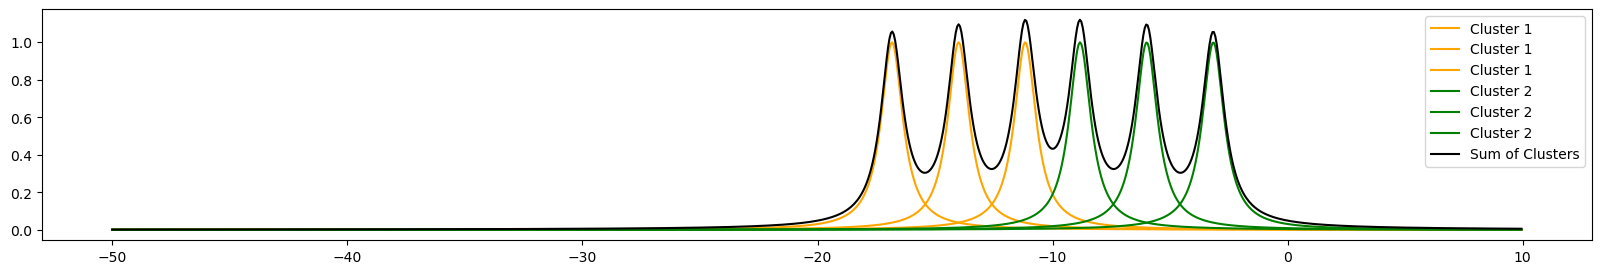

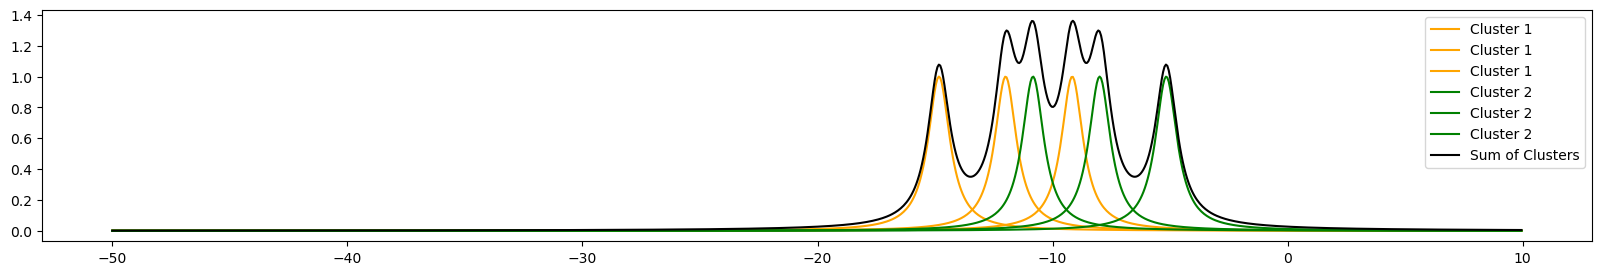

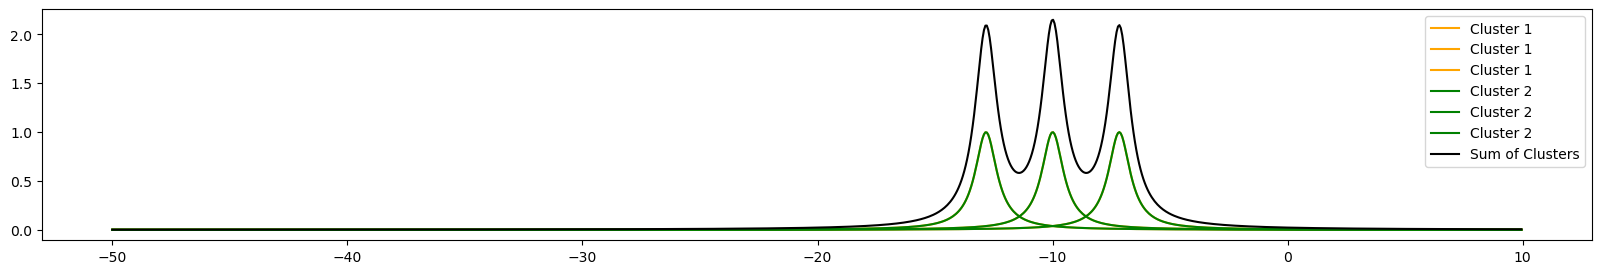

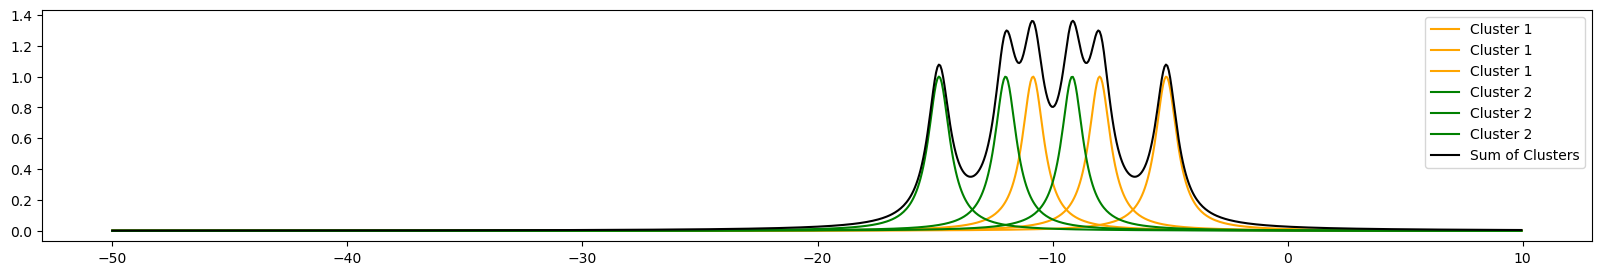

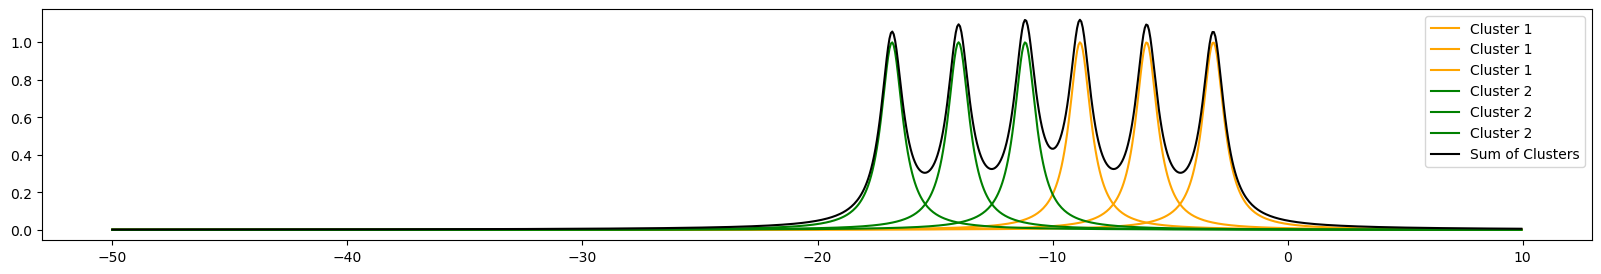

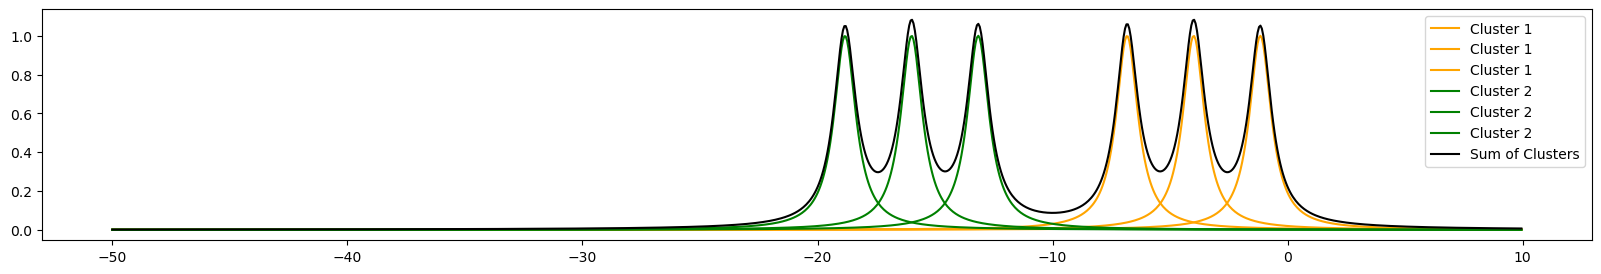

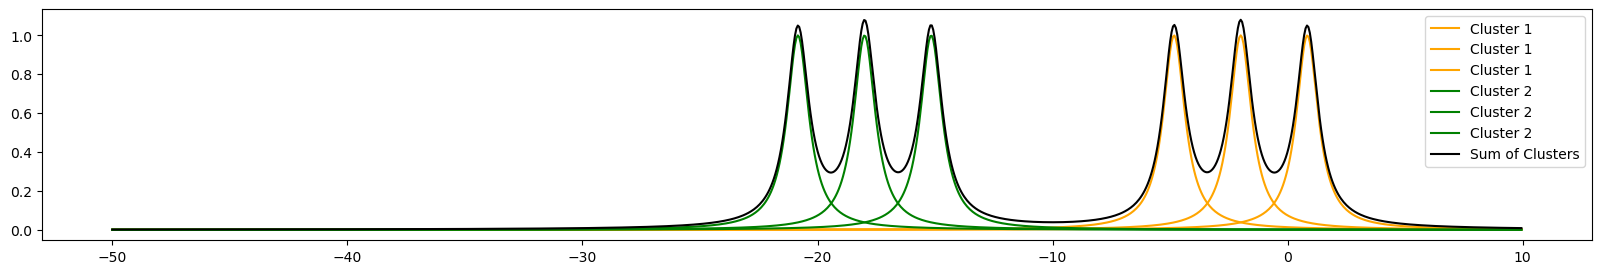

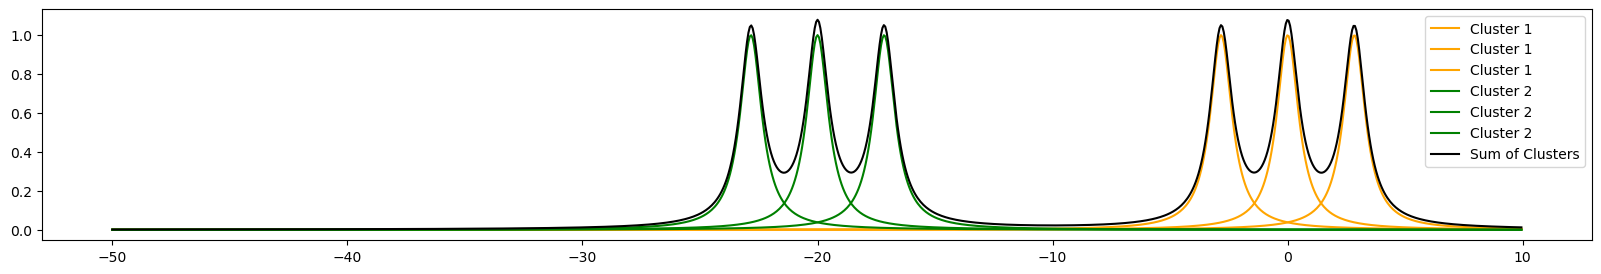

In [19]:

cluster_1_centers = np.linspace(-20, 0, 11) # Varying centers for Cluster 1
print(cluster_1_centers)
cluster_2_centers = -np.linspace(0, 20, 11) # Varying centers for Cluster 2
print(cluster_2_centers)

Cluster_1_sep = 2.852759257 #separation of peaks in cluster 1
Cluster_2_sep = 2.814838969 #separation of peaks in cluster 2

peak_sep = np.mean([Cluster_1_sep, Cluster_2_sep]) #separation of peak

Peak_width = 1

for (cluster_1_center, cluster_2_center) in zip(cluster_1_centers, cluster_2_centers):
    parameter = [(cluster_1_center, peak_sep),(cluster_2_center, peak_sep)]
    peak_arrays = [[] for _ in range(len(parameter))]

    for id, (a,i) in enumerate(parameter):
        peak_array = []
        for j in range(-peaks+2, peaks-1):
            key = f"result{id + 1}_{j}"
            result = a + j * i
            peak_array.append(result)
        peak_arrays[id] = peak_array

    y_sum = np.zeros_like(x)
    plt.figure(figsize=(20,3))
    for id, (peak_array, color) in enumerate(zip(peak_arrays, ["orange", "green"])):
        for peak_center in peak_array:
            y = lorentz(x, gamma = Peak_width, x0 = peak_center)
            y_sum+= y
            plt.plot(x, y, label=f"Cluster {id + 1}", color=color)
            # print(f"Cluster {id + 1}, Peak Center: {peak_center}")

    plt.plot(x, y_sum, color = 'black', label="Sum of Clusters")    
    plt.legend()

In [6]:
for id, peak_array in enumerate(peak_arrays):
    print(peak_array)
print(peak_arrays)

[-2.8337991130000004, 0.0, 2.8337991130000004]
[-2.9337991130000005, -0.1, 2.7337991130000003]
[[-2.8337991130000004, 0.0, 2.8337991130000004], [-2.9337991130000005, -0.1, 2.7337991130000003]]


In [7]:
# plt.plot(x, lorentz(x, Peak_width, peak1_center), color = 'brown')
# plt.plot(x,lorentz(x,Peak_width,  peak2_center), color = 'black' )
# plt.plot(x,lorentz(x,Peak_width,  peak3_center), color = 'grey' )

# plt.plot(x,  lorentz(x, Peak_width, peak1_center) + lorentz(x,Peak_width,  peak2_center) + lorentz(x,Peak_width,  peak3_center))

# plt.plot(x, lorentz(x,Peak_width,  peak4_center), color = 'blue')
# plt.plot(x, lorentz(x,Peak_width,  peak5_center), color = 'pink' )
# plt.plot(x, lorentz(x,Peak_width,  peak6_center), color = 'magenta' )
# plt.plot(x, lorentz(x,Peak_width,  peak4_center) + lorentz(x,Peak_width,  peak5_center) + lorentz(x,Peak_width,  peak6_center))

# plt.plot()
# # plt.show()